In [130]:
from google.colab import files
uploaded = files.upload()


Saving Cancer.csv to Cancer (2).csv


In [131]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
import plotly
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)
cf.go_offline()

In [132]:
df = pd.read_csv("Cancer.csv")

In [133]:
df.head()

Patient Id  Age  Gender  AirPollution  Alcoholuse  DustAllergy  \
0         P1   33       1             2           4            5   
1        P10   17       1             3           1            5   
2       P100   35       1             4           5            6   
3      P1000   37       1             7           7            7   
4       P101   46       1             6           8            7   

   OccuPationalHazards  GeneticRisk  chronicLungDisease  BalancedDiet  ...  \
0                    4            3                   2             2  ...   
1                    3            4                   2             2  ...   
2                    5            5                   4             6  ...   
3                    7            6                   7             7  ...   
4                    7            7                   6             7  ...   

   Fatigue  WeightLoss  ShortnessofBreath  Wheezing  SwallowingDifficulty  \
0        3           4                  2         2                     3   
1        1           3                  7         8                     6   
2        8           7                  9         2                     1   
3        4           2                  3         1                     4   
4        3           2                  4         1                     4   

   ClubbingofFingerNails  FrequentCold  DryCough  Snoring  Level  
0                      1             2         3        4    Low  
1                      2             1         7        2   High  
2                      4             6         7        2   High  
3                      5             6         7        5   High  
4                      2             4         2        3   High  

[5 rows x 25 columns]

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient Id             1000 non-null   object
 1   Age                    1000 non-null   int64 
 2   Gender                 1000 non-null   int64 
 3   AirPollution           1000 non-null   int64 
 4   Alcoholuse             1000 non-null   int64 
 5   DustAllergy            1000 non-null   int64 
 6   OccuPationalHazards    1000 non-null   int64 
 7   GeneticRisk            1000 non-null   int64 
 8   chronicLungDisease     1000 non-null   int64 
 9   BalancedDiet           1000 non-null   int64 
 10  Obesity                1000 non-null   int64 
 11  Smoking                1000 non-null   int64 
 12  PassiveSmoker          1000 non-null   int64 
 13  ChestPain              1000 non-null   int64 
 14  CoughingofBlood        1000 non-null   int64 
 15  Fatigue               

In [135]:
df.drop(['Patient Id'],axis = 1,inplace=True)

In [136]:
df.head()

Age  Gender  AirPollution  Alcoholuse  DustAllergy  OccuPationalHazards  \
0   33       1             2           4            5                    4   
1   17       1             3           1            5                    3   
2   35       1             4           5            6                    5   
3   37       1             7           7            7                    7   
4   46       1             6           8            7                    7   

   GeneticRisk  chronicLungDisease  BalancedDiet  Obesity  ...  Fatigue  \
0            3                   2             2        4  ...        3   
1            4                   2             2        2  ...        1   
2            5                   4             6        7  ...        8   
3            6                   7             7        7  ...        4   
4            7                   6             7        7  ...        3   

   WeightLoss  ShortnessofBreath  Wheezing  SwallowingDifficulty  \
0           4                  2         2                     3   
1           3                  7         8                     6   
2           7                  9         2                     1   
3           2                  3         1                     4   
4           2                  4         1                     4   

   ClubbingofFingerNails  FrequentCold  DryCough  Snoring  Level  
0                      1             2         3        4    Low  
1                      2             1         7        2   High  
2                      4             6         7        2   High  
3                      5             6         7        5   High  
4                      2             4         2        3   High  

[5 rows x 24 columns]

In [137]:
df['Level']

0       Low
1      High
2      High
3      High
4      High
       ... 
995    High
996    High
997    High
998    High
999    High
Name: Level, Length: 1000, dtype: object

In [138]:
df['Level'].replace('Medium','High',inplace=True)

In [139]:
df['Level'].replace('High','1',inplace=True)
df['Level'].replace('Low','0',inplace=True)

In [140]:
df.head()

Age  Gender  AirPollution  Alcoholuse  DustAllergy  OccuPationalHazards  \
0   33       1             2           4            5                    4   
1   17       1             3           1            5                    3   
2   35       1             4           5            6                    5   
3   37       1             7           7            7                    7   
4   46       1             6           8            7                    7   

   GeneticRisk  chronicLungDisease  BalancedDiet  Obesity  ...  Fatigue  \
0            3                   2             2        4  ...        3   
1            4                   2             2        2  ...        1   
2            5                   4             6        7  ...        8   
3            6                   7             7        7  ...        4   
4            7                   6             7        7  ...        3   

   WeightLoss  ShortnessofBreath  Wheezing  SwallowingDifficulty  \
0           4                  2         2                     3   
1           3                  7         8                     6   
2           7                  9         2                     1   
3           2                  3         1                     4   
4           2                  4         1                     4   

   ClubbingofFingerNails  FrequentCold  DryCough  Snoring  Level  
0                      1             2         3        4      0  
1                      2             1         7        2      1  
2                      4             6         7        2      1  
3                      5             6         7        5      1  
4                      2             4         2        3      1  

[5 rows x 24 columns]

In [141]:
df['Level'] = pd.to_numeric(df['Level'])

In [142]:
df.isnull()

Age  Gender  AirPollution  Alcoholuse  DustAllergy  \
0    False   False         False       False        False   
1    False   False         False       False        False   
2    False   False         False       False        False   
3    False   False         False       False        False   
4    False   False         False       False        False   
..     ...     ...           ...         ...          ...   
995  False   False         False       False        False   
996  False   False         False       False        False   
997  False   False         False       False        False   
998  False   False         False       False        False   
999  False   False         False       False        False   

     OccuPationalHazards  GeneticRisk  chronicLungDisease  BalancedDiet  \
0                  False        False               False         False   
1                  False        False               False         False   
2                  False        False               False         False   
3                  False        False               False         False   
4                  False        False               False         False   
..                   ...          ...                 ...           ...   
995                False        False               False         False   
996                False        False               False         False   
997                False        False               False         False   
998                False        False               False         False   
999                False        False               False         False   

     Obesity  ...  Fatigue  WeightLoss  ShortnessofBreath  Wheezing  \
0      False  ...    False       False              False     False   
1      False  ...    False       False              False     False   
2      False  ...    False       False              False     False   
3      False  ...    False       False              False     False   
4      False  ...    False       False              False     False   
..       ...  ...      ...         ...                ...       ...   
995    False  ...    False       False              False     False   
996    False  ...    False       False              False     False   
997    False  ...    False       False              False     False   
998    False  ...    False       False              False     False   
999    False  ...    False       False              False     False   

     SwallowingDifficulty  ClubbingofFingerNails  FrequentCold  DryCough  \
0                   False                  False         False     False   
1                   False                  False         False     False   
2                   False                  False         False     False   
3                   False                  False         False     False   
4                   False                  False         False     False   
..                    ...                    ...           ...       ...   
995                 False                  False         False     False   
996                 False                  False         False     False   
997                 False                  False         False     False   
998                 False                  False         False     False   
999                 False                  False         False     False   

     Snoring  Level  
0      False  False  
1      False  False  
2      False  False  
3      False  False  
4      False  False  
..       ...    ...  
995    False  False  
996    False  False  
997    False  False  
998    False  False  
999    False  False  

[1000 rows x 24 columns]

In [143]:
df.isnull().any()

Age                      False
Gender                   False
AirPollution             False
Alcoholuse               False
DustAllergy              False
OccuPationalHazards      False
GeneticRisk              False
chronicLungDisease       False
BalancedDiet             False
Obesity                  False
Smoking                  False
PassiveSmoker            False
ChestPain                False
CoughingofBlood          False
Fatigue                  False
WeightLoss               False
ShortnessofBreath        False
Wheezing                 False
SwallowingDifficulty     False
ClubbingofFingerNails    False
FrequentCold             False
DryCough                 False
Snoring                  False
Level                    False
dtype: bool

In [144]:
df.isnull().sum()

Age                      0
Gender                   0
AirPollution             0
Alcoholuse               0
DustAllergy              0
OccuPationalHazards      0
GeneticRisk              0
chronicLungDisease       0
BalancedDiet             0
Obesity                  0
Smoking                  0
PassiveSmoker            0
ChestPain                0
CoughingofBlood          0
Fatigue                  0
WeightLoss               0
ShortnessofBreath        0
Wheezing                 0
SwallowingDifficulty     0
ClubbingofFingerNails    0
FrequentCold             0
DryCough                 0
Snoring                  0
Level                    0
dtype: int64

<Axes: >

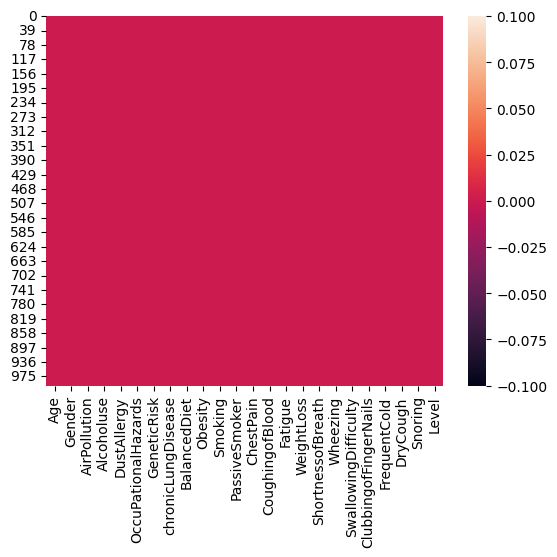

In [145]:
import seaborn as sns
sns.heatmap(df.isnull())

<Axes: xlabel='Smoking', ylabel='count'>

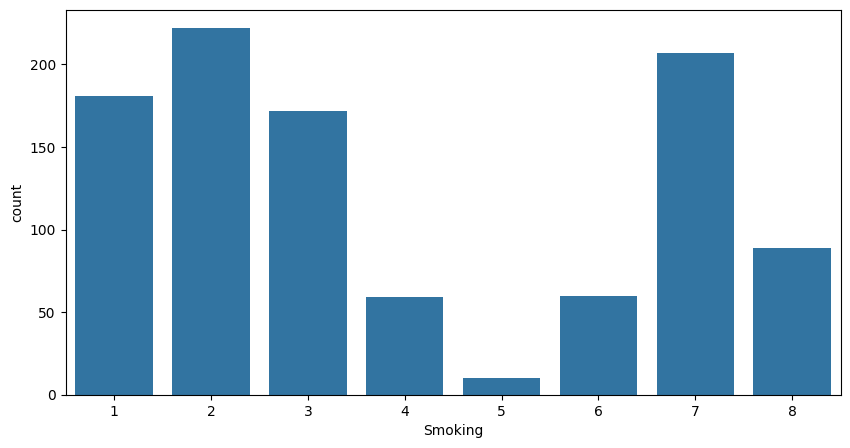

In [146]:
plt.figure(figsize=(10,5))
sns.countplot(x='Smoking',data=df)

<Axes: xlabel='ChestPain', ylabel='count'>

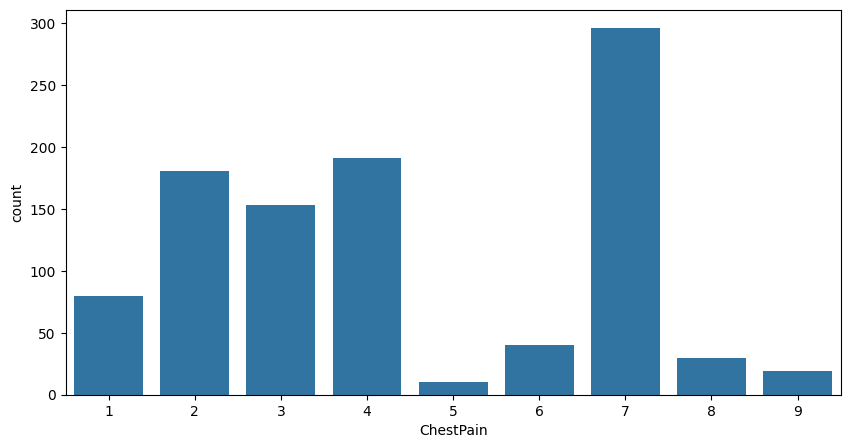

In [147]:
plt.figure(figsize=(10,5))
sns.countplot(x='ChestPain',data = df)

<Axes: xlabel='ChestPain', ylabel='Age'>

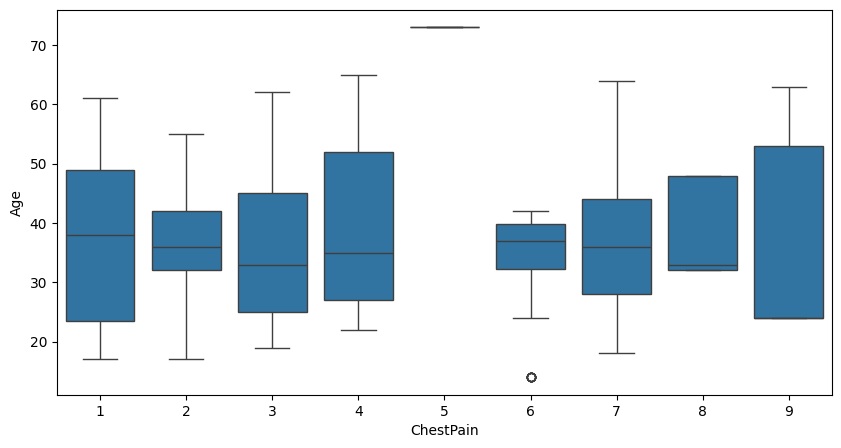

In [148]:
plt.figure(figsize=(10,5))
sns.boxplot(x='ChestPain',y='Age',data = df)

<Axes: xlabel='Smoking', ylabel='Age'>

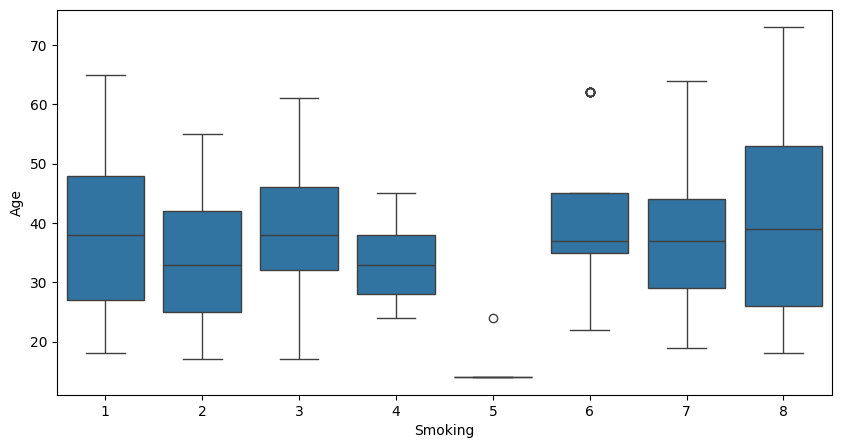

In [149]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Smoking',y='Age',data = df)

In [150]:
sorted_smokers = df.groupby('Age')['Smoking'].count().to_frame()

In [151]:
sorted_smokers.style.background_gradient(cmap = 'Reds')

In [152]:
df.style.background_gradient(cmap = 'Reds')

In [153]:
label = df.Age.sort_values().unique()
target = sorted_smokers.Smoking

In [154]:
print(label)
print(target)

[14 17 18 19 22 23 24 25 26 27 28 29 31 32 33 34 35 36 37 38 39 42 43 44
 45 46 47 48 49 51 52 53 54 55 61 62 63 64 65 73]
Age
14     9
17    20
18    18
19    20
22    19
23    19
24    30
25    30
26    37
27    48
28    32
29    19
31     9
32    31
33    69
34    10
35    77
36    21
37    51
38    69
39    21
42    20
43     1
44    51
45    42
46    23
47    20
48    40
49    10
51     1
52    31
53    19
54     1
55    11
61    10
62    30
63     1
64    10
65    10
73    10
Name: Smoking, dtype: int64


In [155]:
import plotly.graph_objects as go

In [156]:
fig = go.Figure()
fig.add_trace(go.Bar(x=label,y=target))
fig.update_layout(title = 'Smokers per age',xaxis=dict(title='Age'),yaxis=dict(title='Smokers'))
fig.show()

In [157]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=label,y=target,mode='markers+lines'))
fig.update_layout(title = 'Smokers per age',xaxis=dict(title='Age'),yaxis=dict(title='Smokers'))
fig.show()

**Machine Learning**

**RandomForest Classifier**

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import log_loss, f1_score
from sklearn.model_selection import cross_val_score
import numpy as np
acc_dict = {}
# create the data
X = df.drop('Level',axis = 1)
y = df['Level']
X_train, X_test, y_train, y_test = train_test_split(X,y)

Accuracy score :  100.0


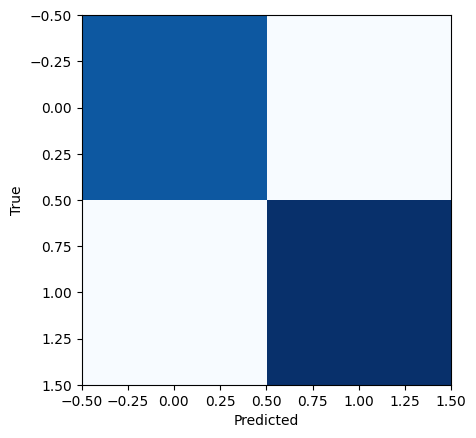

In [159]:
from sklearn.ensemble import RandomForestClassifier

# create model
rf_model = rf_grid.best_estimator_

# fit the data in the model
rf_model.fit(X_train, y_train)

y_pred_randomF = rf_model.predict(X_test)
print('Accuracy score : ', accuracy_score(y_test, y_pred_randomF) * 100)

acc_dict['RFC_log_loss'] = log_loss(y_test, y_pred_randomF)
acc_dict['RFC_F!1_Score'] = f1_score(y_test, y_pred_randomF, average='weighted')

# prediction visualization
cm = confusion_matrix(y_test, y_pred_randomF)
cm_log = np.log1p(cm)

plt.imshow(cm_log, cmap='Blues', interpolation='nearest')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

**KNeighbourClassifier**

Best k is 3 with score 0.9973333333333333
Accuracy score :  100.0


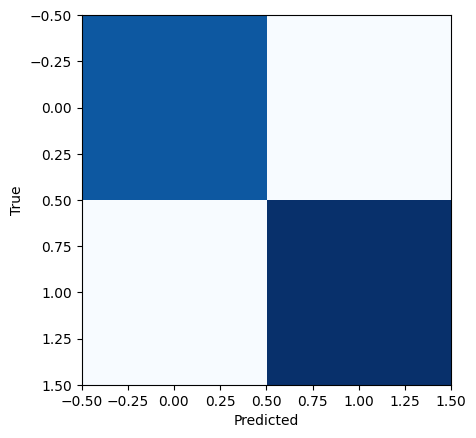

In [160]:
from sklearn.neighbors import KNeighborsClassifier

# to find the best k
score = 0
scores, highscore, bestk = 0, 0, 0

for k in range(3, 12):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train)
    score = scores.mean()
    if score > highscore:
        highscore = score
        bestk = k

print('Best k is {} with score {}'.format(bestk, highscore))

knn = KNeighborsClassifier(n_neighbors=bestk)
knn.fit(X_train, y_train)

# prediction
y_predict = knn.predict(X_test)
print('Accuracy score : ', accuracy_score(y_test, y_predict) * 100)

acc_dict['KNN_log_loss'] = log_loss(y_test, y_predict)
acc_dict['KNN_F!1_Score'] = f1_score(y_test, y_predict, average='weighted')

# prediction visualization
cm = confusion_matrix(y_test, y_predict)
cm_log = np.log1p(cm)

plt.imshow(cm_log, cmap='Blues', interpolation='nearest')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

**KMeans Clustering**

Accuracy score :  5.6000000000000005


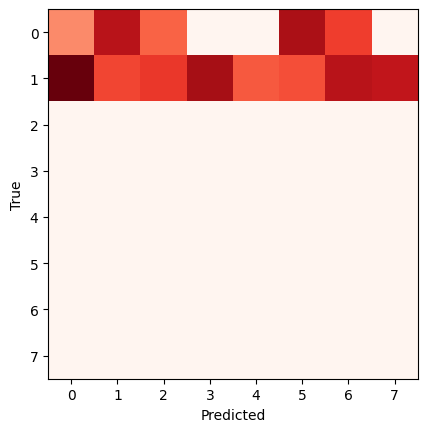

In [161]:
from sklearn.cluster import KMeans

clf = KMeans()
clf.fit(X_train)

maxx = clf.predict(X_test)
print('Accuracy score : ', accuracy_score(y_test, maxx)*100)

acc_dict['kMeans_log_loss'] = log_loss(y_test, maxx)
acc_dict['kMeans_F1_Score'] = f1_score(y_test, maxx, average='weighted')

# prediction visualization
cm = confusion_matrix(y_test, maxx)
cm_log = np.log1p(cm)

plt.imshow(cm_log, cmap='Reds', interpolation='nearest')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

**Tree Classifier**

Accuracy score :  100.0


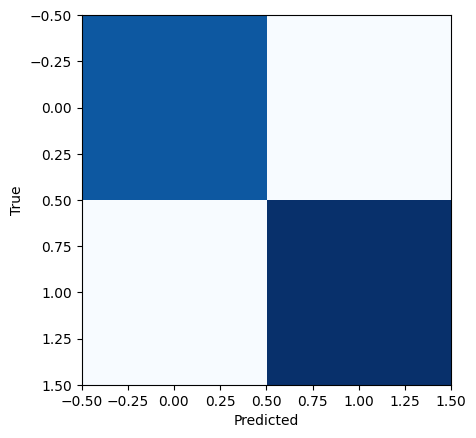

In [162]:
from sklearn.tree import DecisionTreeClassifier

tree_ = DecisionTreeClassifier()
tree_.fit(X_train, y_train)

y_pred = tree_.predict(X_test)
print('Accuracy score : ', accuracy_score(y_test, y_pred) * 100)

acc_dict['Tree_log_loss'] = log_loss(y_test, y_pred)
acc_dict['Tree_f!1_score'] = f1_score(y_test, y_pred)

# prediction visualization
cm = confusion_matrix(y_test, y_pred)
cm_log = np.log1p(cm)

plt.imshow(cm_log, cmap='Blues', interpolation='nearest')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

**SVM**

Accuracy score :  99.6


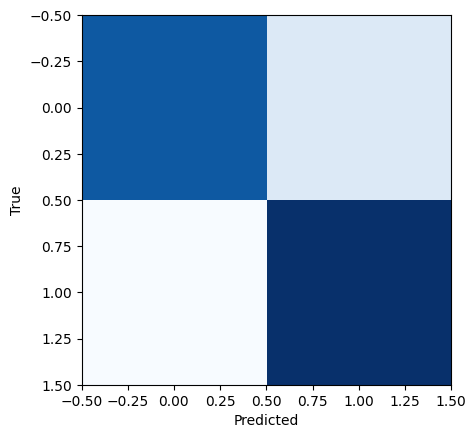

In [163]:
from sklearn.svm import SVC

model = SVC(probability=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy score : ', accuracy_score(y_test, y_pred) * 100)

acc_dict['svc_log_loss'] = log_loss(y_test, y_pred)
acc_dict['svc_f!1_score'] = f1_score(y_test, y_pred)

# prediction visualization
cm = confusion_matrix(y_test, y_pred)
cm_log = np.log1p(cm)

plt.imshow(cm_log, cmap='Blues', interpolation='nearest')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

**Hyperparameter Tuning Using GridSearchCV**

In [164]:
from sklearn.model_selection import GridSearchCV

rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=rf_params,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)

print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Best Random Forest Score:", rf_grid.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest Score: 1.0


In [165]:
svc_params = {
    "C": [0.1, 1, 10],
    "kernel": ["rbf", "linear"],
    "gamma": ["scale", "auto"]
}

svc_grid = GridSearchCV(
    estimator=SVC(),
    param_grid=svc_params,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

svc_grid.fit(X_train, y_train)

print("Best SVC Parameters:", svc_grid.best_params_)
print("Best SVC Score:", svc_grid.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best SVC Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best SVC Score: 1.0


In [166]:
knn_params = {
    "n_neighbors": list(range(3, 20)),
    "weights": ["uniform", "distance"]
}

knn_grid = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_params,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

knn_grid.fit(X_train, y_train)

print("Best KNN Parameters:", knn_grid.best_params_)
print("Best KNN Score:", knn_grid.best_score_)

Fitting 5 folds for each of 34 candidates, totalling 170 fits
Best KNN Parameters: {'n_neighbors': 13, 'weights': 'distance'}
Best KNN Score: 0.9986623355876244


**Advanced Models: XGBoost and LightGBM**

**MODEL 1 — XGBoost Classifier**

In [167]:
!pip install xgboost

XGBoost Accuracy: 100.0


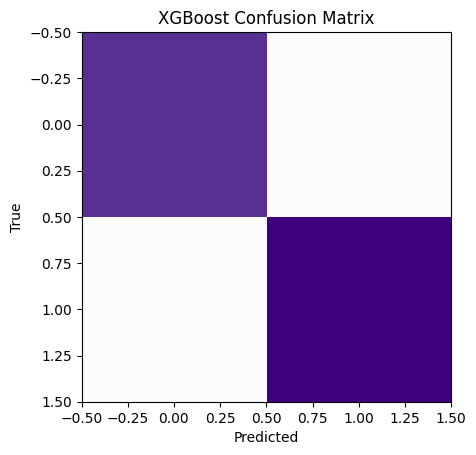

In [168]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb) * 100)

acc_dict['XGB_log_loss'] = log_loss(y_test, y_pred_xgb)
acc_dict['XGB_F1_Score'] = f1_score(y_test, y_pred_xgb, average='weighted')

cm = confusion_matrix(y_test, y_pred_xgb)
cm_log = np.log1p(cm)

plt.imshow(cm_log, cmap='Purples', interpolation='nearest')
plt.title("XGBoost Confusion Matrix")
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

**MODEL 2 — LightGBM Classifier**

In [169]:
!pip install lightgbm

[LightGBM] [Info] Number of positive: 524, number of negative: 226
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 750, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698667 -> initscore=0.840957
[LightGBM] [Info] Start training from score 0.840957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

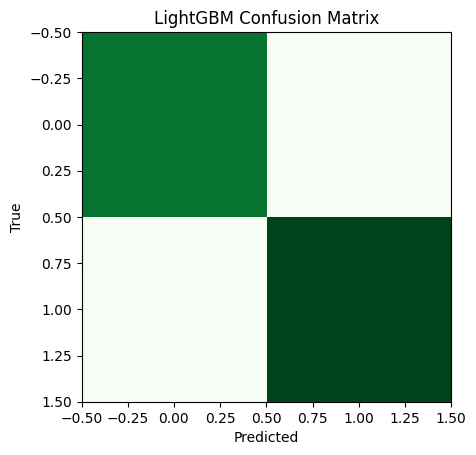

In [170]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8
)

lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb) * 100)

acc_dict['LGB_log_loss'] = log_loss(y_test, y_pred_lgb)
acc_dict['LGB_F1_Score'] = f1_score(y_test, y_pred_lgb, average='weighted')

cm = confusion_matrix(y_test, y_pred_lgb)
cm_log = np.log1p(cm)

plt.imshow(cm_log, cmap='Greens', interpolation='nearest')
plt.title("LightGBM Confusion Matrix")
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

**ROC Curves and AUC Score for Model Comparison**

In [171]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

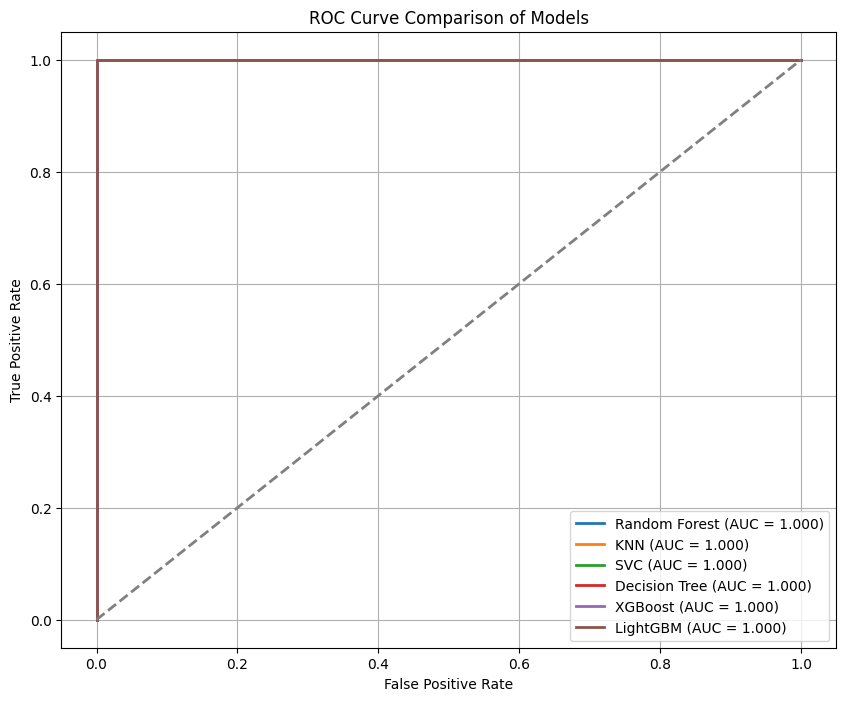

In [172]:
plt.figure(figsize=(10, 8))

models_for_roc = {
    "Random Forest": rf_model,
    "KNN": knn,
    "SVC": model,
    "Decision Tree": tree_,
    "XGBoost": xgb_model,
    "LightGBM": lgb_model
}

for model_name, model_obj in models_for_roc.items():
    # Get probabilities for positive class
    y_prob = model_obj.predict_proba(X_test)[:, 1]

    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot each model
    plt.plot(fpr, tpr, lw=2, label=f"{model_name} (AUC = {roc_auc:.3f})")

# Chance line
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')

plt.title("ROC Curve Comparison of Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

**Interactive Cancer Prediction UI**

In [173]:
!pip install ipywidgets
from google.colab import output
output.enable_custom_widget_manager()

In [174]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

# trained model here
model = rf_model

# feature order from training
feature_order = [
    'Age',
    'Gender',
    'AirPollution',
    'Alcoholuse',
    'DustAllergy',
    'OccuPationalHazards',
    'GeneticRisk',
    'chronicLungDisease',
    'BalancedDiet',
    'Obesity',
    'Smoking',
    'PassiveSmoker',
    'ChestPain',
    'CoughingofBlood',
    'Fatigue',
    'WeightLoss',
    'ShortnessofBreath',
    'Wheezing',
    'SwallowingDifficulty',
    'ClubbingofFingerNails',
    'FrequentCold',
    'DryCough',
    'Snoring'
]

# REALISTIC widgets for each feature
widgets_map = {
    "Age": widgets.IntSlider(min=20, max=80, value=35, description="Age"),
    "Gender": widgets.Dropdown(options=[("Male", 1), ("Female", 0)], description="Gender"),
    "AirPollution": widgets.IntSlider(min=1, max=10, value=5, description="Air Pollution"),
    "Alcoholuse": widgets.IntSlider(min=1, max=10, value=5, description="Alcohol Use"),
    "DustAllergy": widgets.IntSlider(min=1, max=10, value=5, description="Dust Allergy"),
    "OccuPationalHazards": widgets.IntSlider(min=1, max=10, value=5, description="Occupational Hazards"),
    "GeneticRisk": widgets.IntSlider(min=1, max=10, value=5, description="Genetic Risk"),
    "chronicLungDisease": widgets.Dropdown(options=[("No", 0), ("Yes", 1)], description="Chronic Lung Disease"),
    "BalancedDiet": widgets.IntSlider(min=1, max=10, value=5, description="Balanced Diet"),
    "Obesity": widgets.IntSlider(min=1, max=10, value=5, description="Obesity"),
    "Smoking": widgets.IntSlider(min=1, max=10, value=5, description="Smoking"),
    "PassiveSmoker": widgets.IntSlider(min=1, max=10, value=5, description="Passive Smoker"),
    "ChestPain": widgets.Dropdown(options=[("No", 0), ("Yes", 1)], description="Chest Pain"),
    "CoughingofBlood": widgets.Dropdown(options=[("No", 0), ("Yes", 1)], description="Coughing of Blood"),
    "Fatigue": widgets.Dropdown(options=[("No", 0), ("Yes", 1)], description="Fatigue"),
    "WeightLoss": widgets.Dropdown(options=[("No", 0), ("Yes", 1)], description="Weight Loss"),
    "ShortnessofBreath": widgets.Dropdown(options=[("No", 0), ("Yes", 1)], description="Shortness of Breath"),
    "Wheezing": widgets.Dropdown(options=[("No", 0), ("Yes", 1)], description="Wheezing"),
    "SwallowingDifficulty": widgets.Dropdown(options=[("No", 0), ("Yes", 1)], description="Swallowing Difficulty"),
    "ClubbingofFingerNails": widgets.Dropdown(options=[("No", 0), ("Yes", 1)], description="Clubbing of Finger Nails"),
    "FrequentCold": widgets.Dropdown(options=[("No", 0), ("Yes", 1)], description="Frequent Cold"),
    "DryCough": widgets.Dropdown(options=[("No", 0), ("Yes", 1)], description="Dry Cough"),
    "Snoring": widgets.Dropdown(options=[("No", 0), ("Yes", 1)], description="Snoring"),
}

predict_button = widgets.Button(description="Predict Cancer Risk", button_style='success')
output_box = widgets.Output()

def on_predict_clicked(b):
    output_box.clear_output()

    row = [widgets_map[feat].value for feat in feature_order]

    df_input = pd.DataFrame([row], columns=feature_order)

    pred = model.predict(df_input)[0]

    with output_box:
        print("Predicted Cancer Risk Level:", pred)
        if hasattr(model, "predict_proba"):
            print("\nClass Probabilities:")
            print(model.predict_proba(df_input)[0])

predict_button.on_click(on_predict_clicked)

# Display UI
ui_elements = [widgets_map[feat] for feat in feature_order] + [predict_button, output_box]
display(widgets.VBox(ui_elements))


**Model Explainability with SHAP**

In [175]:
# SHAP Explainability for Random Forest
!pip install shap

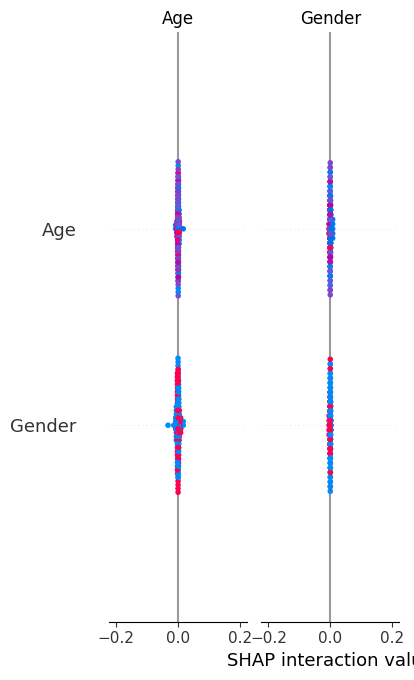

In [176]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

**Accuracy Report**

In [177]:
models = {
    "Random Forest": rf_model,
    "KNN": knn,
    "SVC": model,
    "Decision Tree": tree_,
    "XGBoost": xgb_model,
    "LightGBM": lgb_model
}

models

{'Random Forest': RandomForestClassifier(),
 'KNN': KNeighborsClassifier(n_neighbors=3),
 'SVC': RandomForestClassifier(),
 'Decision Tree': DecisionTreeClassifier(),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, feature_weights=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.05, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=6, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=300, n_jobs=None,
               num_parallel_tree=None, ...),
 'LightGBM': LGBMClassifier(colsam

In [178]:
from sklearn.metrics import roc_auc_score

def get_auc(model, X_test, y_test):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        return roc_auc_score(y_test, y_prob)
    else:
        return None

In [179]:
comparison_rows = []

for model_name, model_obj in models.items():

    # Accuracy
    y_pred = model_obj.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    # F1 Score
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Log Loss
    try:
        ll = log_loss(y_test, model_obj.predict_proba(X_test))
    except:
        ll = None

    # AUC score
    auc_score = get_auc(model_obj, X_test, y_test)

    comparison_rows.append({
        "Model": model_name,
        "Accuracy": acc,
        "F1 Score": f1,
        "Log Loss": ll,
        "AUC Score": auc_score
    })

comparison_table = pd.DataFrame(comparison_rows)
comparison_table.style.background_gradient(cmap="Blues").format("{:.3f}")
comparison_table

Model  Accuracy  F1 Score      Log Loss  AUC Score
0  Random Forest       1.0       1.0  4.422148e-04        1.0
1            KNN       1.0       1.0  2.220446e-16        1.0
2            SVC       1.0       1.0  4.422148e-04        1.0
3  Decision Tree       1.0       1.0  2.220446e-16        1.0
4        XGBoost       1.0       1.0  2.973614e-03        1.0
5       LightGBM       1.0       1.0  2.755464e-06        1.0

**Learning Curves & Overfitting Analysis**

In [180]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

In [181]:
def plot_learning_curve(model, X, y, title="Learning Curve", cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    train_std = np.std(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Training Score", marker='o')
    plt.plot(train_sizes, test_mean, label="Cross-Validation Score", marker='o')

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

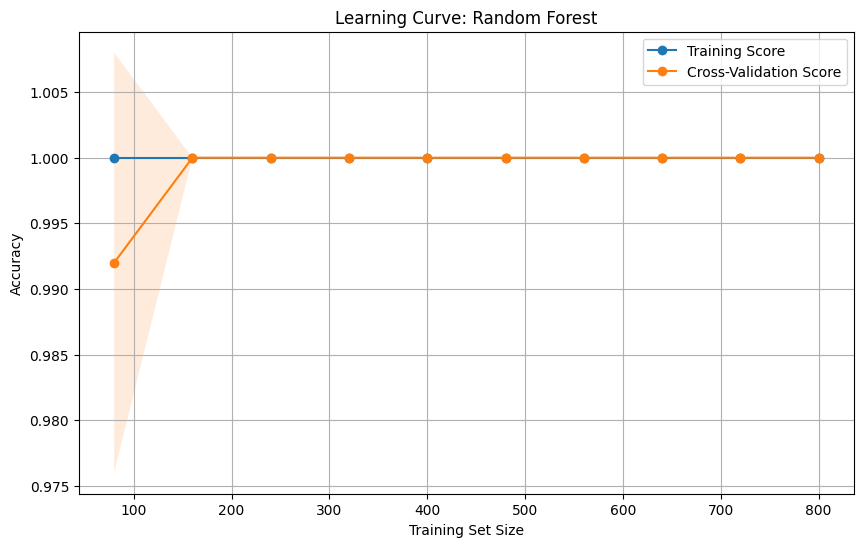

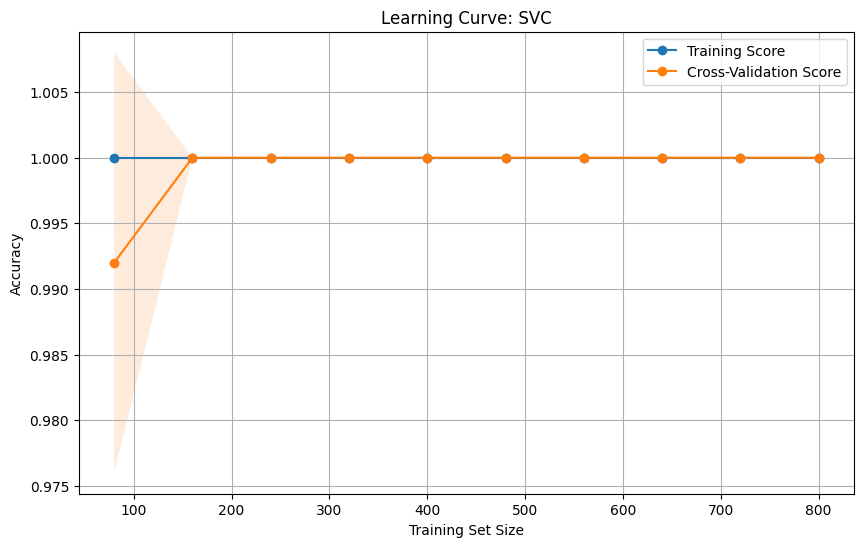

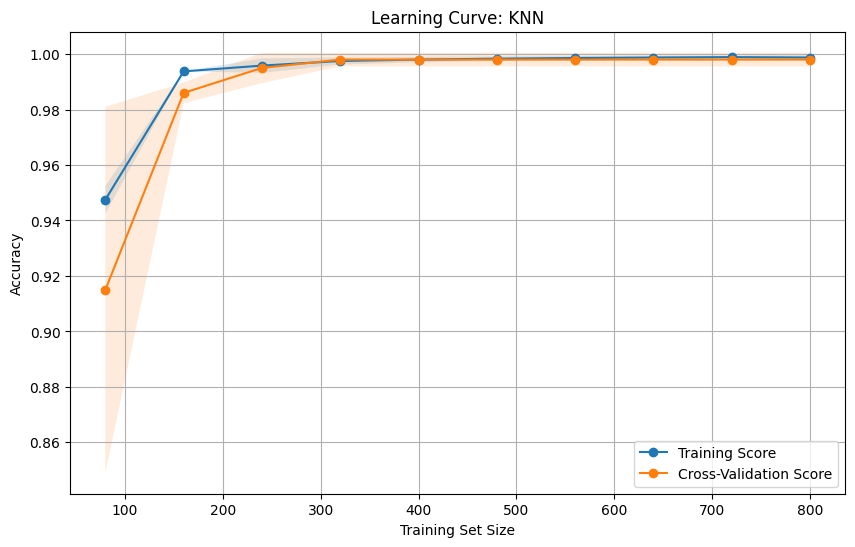

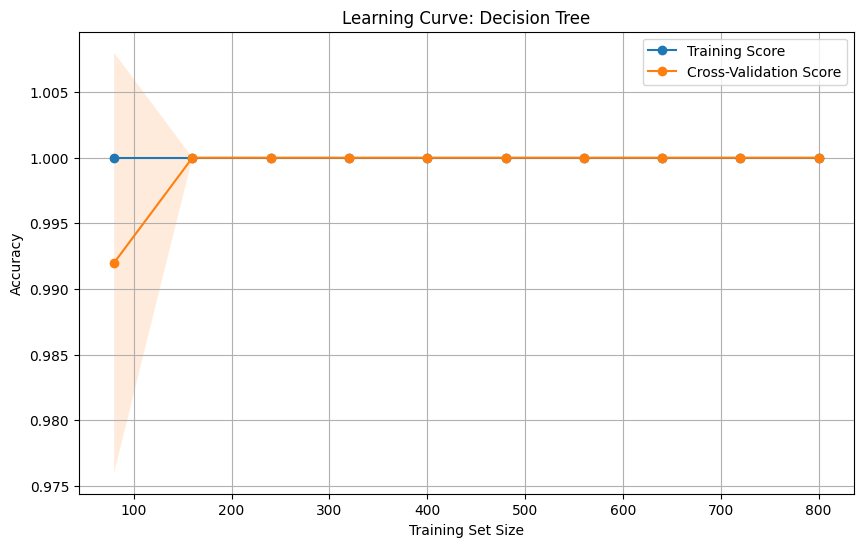

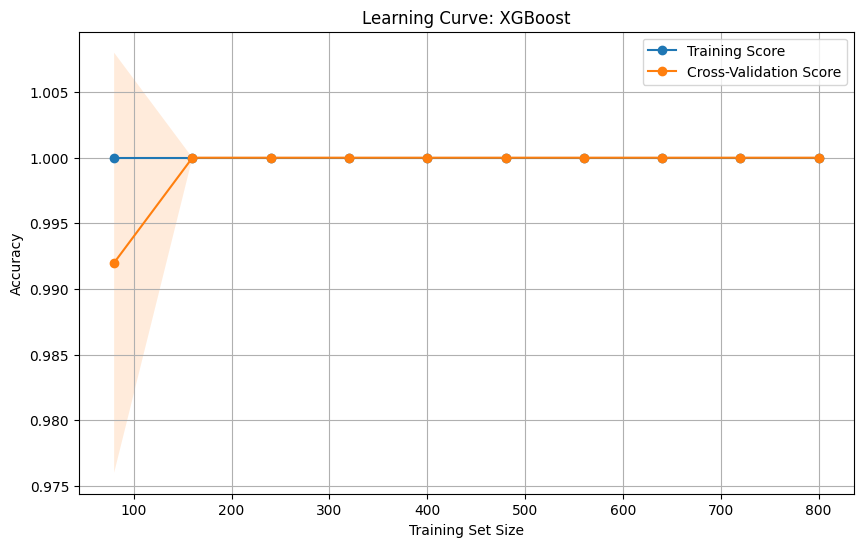

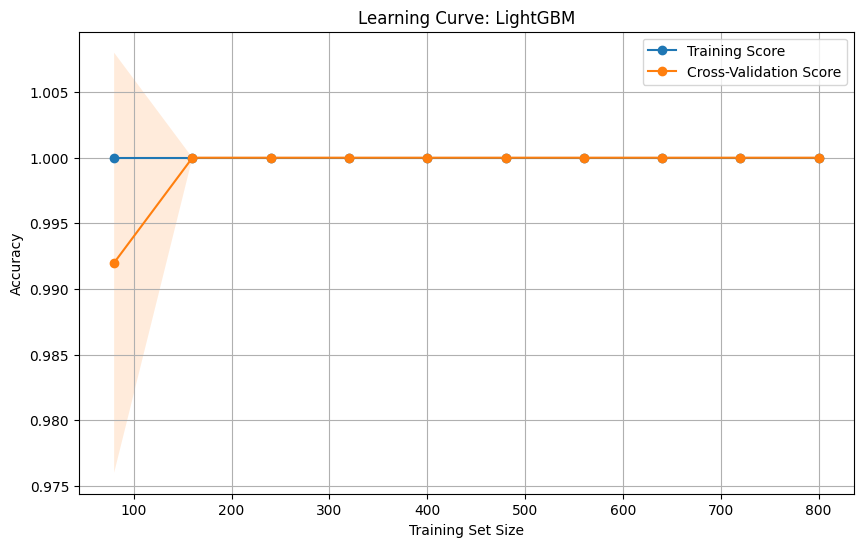

In [182]:
plot_learning_curve(rf_model, X, y, title="Learning Curve: Random Forest")
plot_learning_curve(model, X, y, title="Learning Curve: SVC")
plot_learning_curve(knn, X, y, title="Learning Curve: KNN")
plot_learning_curve(tree_, X, y, title="Learning Curve: Decision Tree")
plot_learning_curve(xgb_model, X, y, title="Learning Curve: XGBoost")
plot_learning_curve(lgb_model, X, y, title="Learning Curve: LightGBM")